In [115]:
import IPython
import os
os.system("ls [a-z]*.md | grep -v 'ports\.md' |grep -v audris | sed 's/\.md$//'| sort -u >ids.txt")
with open('ids.txt') as f:
    files = [ x.strip('\n') for x in f.readlines() ]
print (files)

# Create labels for the graph
flab = files
len(files)

['aartates', 'ababjac', 'abahour2', 'abrock14', 'acook46', 'aenzor', 'aesser', 'ahickm18', 'ahillhou', 'amcdan23', 'aphan2', 'awalsh15', 'awelden2', 'batkhamj', 'bbutle11', 'beken', 'bgullet1', 'bkammerd', 'bklein3', 'bmclaug6', 'broachel', 'bschwar7', 'cbeckfor', 'cbrook53', 'cbrow216', 'cearhear', 'chagens', 'cjohn260', 'clee95', 'csmit402', 'cwang93', 'delzinga', 'dhuang14', 'dscott57', 'dseals3', 'dwhite75', 'dwill148', 'eander68', 'echavez2', 'elidberb', 'friya', 'gkirk', 'hfarahat', 'hhaynie', 'imulet', 'jallbrit', 'jamin', 'jblanch8', 'jclar168', 'jim5', 'jmandzak', 'jrodeghi', 'jsadik', 'jstaman', 'jsun36', 'klee50', 'kmaclin1', 'kyumhan', 'lgangula', 'ljakstas', 'lpearcy1', 'lsharpe8', 'lwrinkle', 'mdeleon1', 'mdenise', 'mduraney', 'nmize1', 'npatel79', 'ntayefeh', 'oameli', 'pattle', 'pbowlin1', 'relgedaw', 'rlinder', 'robdgrif', 'rpatel77', 'rschenck', 'rseamons', 'rsexton8', 'rswan', 'rwill166', 'sblank11', 'shoque', 'sjohn248', 'smishr11', 'spate118', 'spunjani', 'tainley'

105

In [4]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
documents = []

text = ""
for f in files:
  a = open (f+".md")
  line = a.read()
  documents .append(line)
  text = text + " " + line
      
#Do tf.idf magic 
tfidf = TfidfVectorizer().fit_transform(documents)
# no need to normalize, since Vectorizer will return normalized tf-idf
# we may want to see these, e.g., analyze in R
pd .DataFrame.from_records(tfidf.A).to_csv('tfidf.csv')

In [5]:
# Lets see the similarity matrix
# first create labels
idx = {}
for i in range(len(files)):
    idx[i] = files [i]

# Multiply the tfidf matrix to get all pairwise distances    
df = pd. DataFrame.from_records((tfidf * tfidf.T).A,columns=files)

#do pretty printing
pd.options.display.float_format = '{:20,.3f}'.format
df = df.rename(index=idx)
#Output to a file in case we want to look at it separately
df.to_csv("dist.csv")
df

,aartates,ababjac,abahour2,abrock14,acook46,aenzor,aesser,ahickm18,ahillhou,amcdan23,...,vhanset,vhazlewo,whannon1,wparham1,yahmad1,zhamm,zhayes2,zlim2,zmalkmus,zwilli13
aartates,1.000,0.090,0.053,0.096,0.116,0.117,0.075,0.104,0.123,0.019,...,0.137,0.069,0.141,0.133,0.101,0.072,0.055,0.118,0.116,0.087
ababjac,0.090,1.000,0.131,0.108,0.187,0.108,0.099,0.154,0.070,0.011,...,0.096,0.150,0.078,0.114,0.313,0.054,0.095,0.159,0.082,0.132
abahour2,0.053,0.131,1.000,0.078,0.131,0.070,0.128,0.089,0.026,0.022,...,0.144,0.145,0.046,0.085,0.131,0.058,0.075,0.092,0.062,0.143
abrock14,0.096,0.108,0.078,1.000,0.110,0.162,0.106,0.082,0.102,0.021,...,0.140,0.129,0.135,0.103,0.132,0.123,0.122,0.106,0.086,0.116
acook46,0.116,0.187,0.131,0.110,1.000,0.069,0.123,0.179,0.094,0.112,...,0.258,0.165,0.126,0.153,0.182,0.072,0.116,0.154,0.137,0.178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zhamm,0.072,0.054,0.058,0.123,0.072,0.128,0.051,0.090,0.115,0.005,...,0.093,0.106,0.062,0.088,0.077,1.000,0.078,0.081,0.099,0.119
zhayes2,0.055,0.095,0.075,0.122,0.116,0.112,0.035,0.125,0.139,0.015,...,0.116,0.096,0.130,0.086,0.094,0.078,1.000,0.060,0.095,0.124
zlim2,0.118,0.159,0.092,0.106,0.154,0.140,0.169,0.090,0.141,0.013,...,0.165,0.105,0.116,0.120,0.281,0.081,0.060,1.000,0.088,0.129
zmalkmus,0.116,0.082,0.062,0.086,0.137,0.058,0.176,0.139,0.176,0.014,...,0.157,0.095,0.098,0.115,0.103,0.099,0.095,0.088,1.000,0.137


0.5757410005711483
bkammerd jclar168 tcultice delzinga lpearcy1 cbeckfor hfarahat 
aenzor bmclaug6 bgullet1 lgangula imulet mduraney rwill166 
rpatel77 jstaman rswan elidberb tnitzsch acook46 vhanset 
awalsh15 jim5 gkirk rsexton8 wparham1 dscott57 vhazlewo 
cbrow216 tneuefei ntayefeh vbhupati beken abahour2 aphan2 
jrodeghi tainley spunjani tkhan7 troger28 cbrook53 robdgrif 
nmize1 rschenck csmit402 pbowlin1 smishr11 zhayes2 chagens 
lsharpe8 sblank11 batkhamj jsun36 eander68 relgedaw kmaclin1 
clee95 dhuang14 pattle zwilli13 bschwar7 hhaynie ahickm18 
cearhear cjohn260 oameli friya shoque jsadik spate118 
npatel79 rseamons sjohn248 rlinder jallbrit jmandzak ababjac 
yahmad1 broachel zlim2 jamin jblanch8 tharshba zhamm 
klee50 mdeleon1 mdenise dwill148 ljakstas aesser zmalkmus 
ahillhou whannon1 bbutle11 dseals3 lwrinkle aartates cwang93 
amcdan23 bklein3 abrock14 awelden2 echavez2 dwhite75 kyumhan 



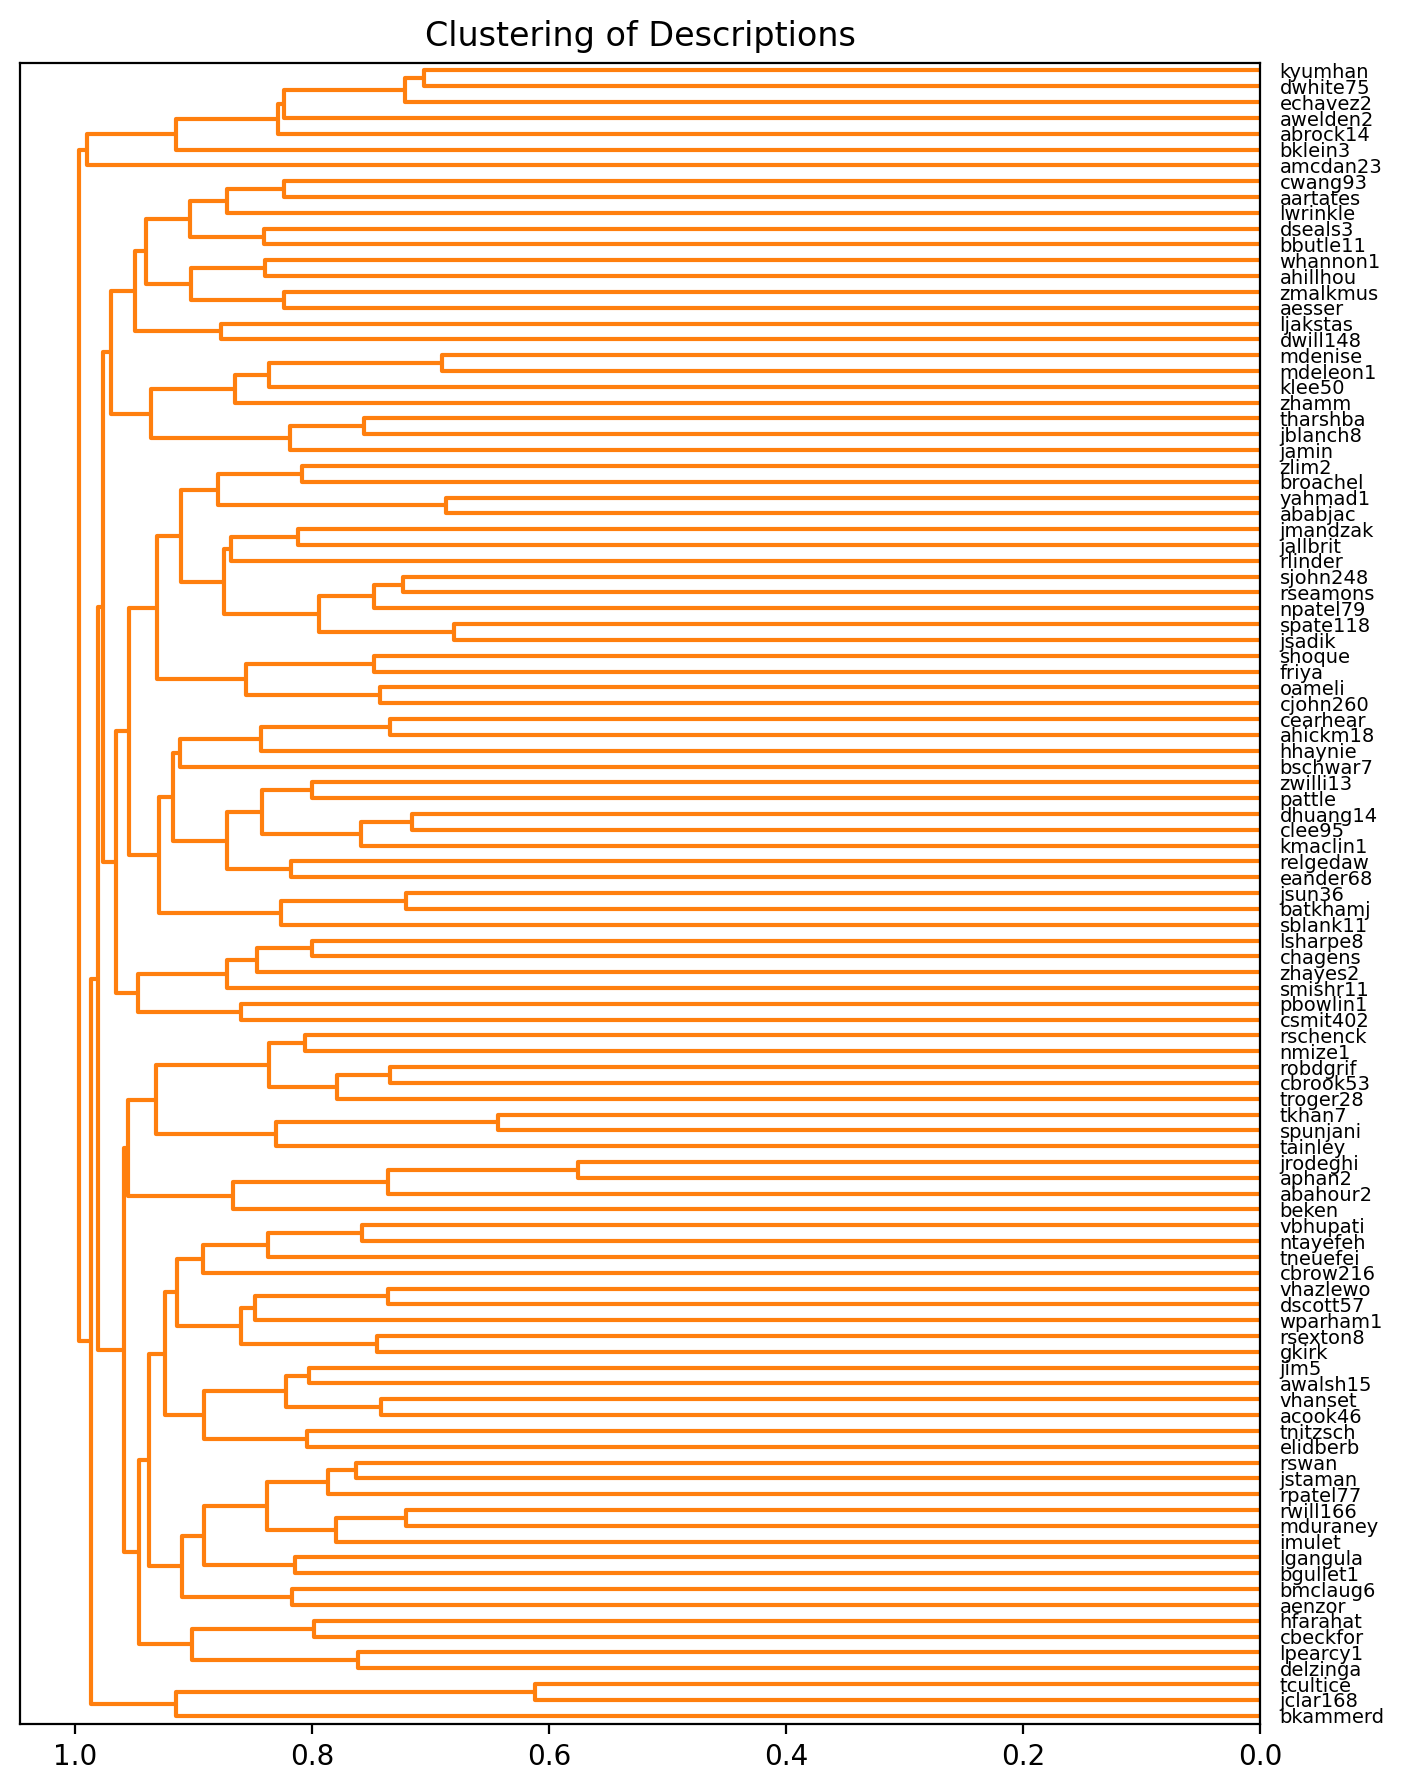

In [116]:
from scipy.cluster.hierarchy import linkage, ward, dendrogram
from scipy.spatial.distance import pdist
import math, sys
import matplotlib.pyplot as plt
import numpy as np
import re

%matplotlib inline

# Calculate cosine distance (clustering needs distance, not similarity)   
#dist ij = dist2 [i*(n-1)+j] and i < j
dist1 = pdist(tfidf.A, 'cosine')
minVal = min(dist1)
print(minVal)
d1 = len(files)-1
ij = np.where(dist1==minVal)[0][0]
for i in range(0,d1):
    for j in range (i+1,d1):
        ij -= 1
        if ij == 0: 
            break
    else:        
        continue  
    break



# Do clustering
linkage_matrix = linkage (dist1, method='complete')
#print(linkage_matrix)

# Plot results
fig = plt.figure(1, figsize=(8, 11),dpi=200)
plt.clf()
ddata = dendrogram(linkage_matrix,
               color_threshold=1,
               p=97,
               labels=flab,
               truncate_mode='none',
               orientation='left',
                show_leaf_counts=True,leaf_font_size =7
               )
for j in range (15):
  for i in range (7):
     sys.stdout.write(flab[ddata['leaves'][j*7+i]]+' ')
  sys.stdout.write('\n')
for i in range (15*7, d1+1):
  sys.stdout.write(flab[ddata['leaves'][i]]+' ')
sys.stdout.write('\n')        

plt.title("Clustering of Descriptions")
fig.savefig("teaming.png")

# Investigate interactive graph

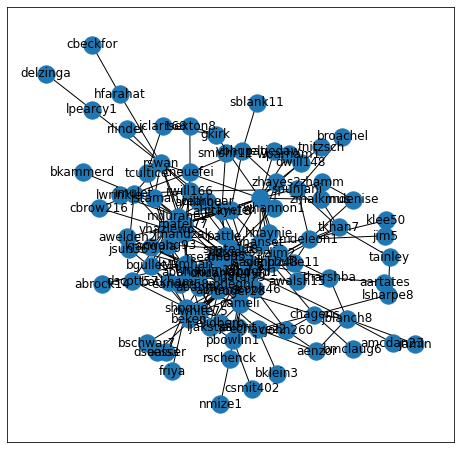

In [65]:

import networkx as nx
import json
import matplotlib.pyplot as plt
%matplotlib inline


# use these distances to create a graph by cutting links below .2 
lbl = {}
nxg = nx.Graph()
for i in range(len(files)-1):
    nxg.add_node(i, label=flab[i])
    lbl[i]=flab[i]
for i in range(len(files)-1):    
    nLinks = 0
    maxVal = 0
    jMax = 0
    for j in range(i+1,len(files)):        
        if df.iloc[i,j] > maxVal: 
            maxVal = df.iloc[i,j]
            if i != j: jMax = j
        if (df.iloc[i,j] > .2):
            nLinks += 1
            nxg.add_edge(i, j, weight=math.sqrt(df.iloc[i,j]*150+1),color='yellow')
    if nLinks == 0:
        nxg.add_edge(i, jMax, weight=10,color='red')
        
#print (nxg.nodes())

fig, ax = plt.subplots(1, 1, figsize=(8, 8));
nx.draw_networkx(nxg, ax=ax, labels=lbl )


nodes = [{'name': nxg.nodes()[i]  } for i in nxg.nodes() ]
links = [{'source': u[0], 'target': u[1]} for u in nxg.edges()]
with open('graph.json', 'w') as f:
    json.dump({'nodes': nodes, 'links': links}, f, indent=4,)





In [112]:
%%html
<div id="d3-students"></div>
<style>
.node {stroke: #fff; stroke-width: 1.5px;}
.link {stroke: #999; stroke-opacity: .6;}
</style>

In [113]:
%%javascript
// We load the d3.js library from the Web.
require.config({paths:
    {d3: "http://d3js.org/d3.v3.min"}});
require(["d3"], function(d3) {
  // The code in this block is executed when the
  // d3.js library has been loaded.

  // First, we specify the size of the canvas
  // containing the visualization (size of the
  // <div> element).
  var width = 300, height = 300;

  // We create a color scale.
  var color = d3.scale.category10();

  // We create a force-directed dynamic graph layout.
  var force = d3.layout.force()
    .charge(-50)
    .linkDistance(20)
    .size([width, height]);

  // In the <div> element, we create a <svg> graphic
  // that will contain our interactive visualization.
  var svg = d3.select("#d3-students").select("svg")
  if (svg.empty()) {
    svg = d3.select("#d3-students").append("svg")
          .attr("width", width)
          .attr("height", height);
  }

  // We load the JSON file.
  d3.json("graph.json", function(error, graph) {
    // In this block, the file has been loaded
    // and the 'graph' object contains our graph.

    // We load the nodes and links in the
    // force-directed graph.
    force.nodes(graph.nodes)
      .links(graph.links)
      .start();

    // We create a <line> SVG element for each link
    // in the graph.
    var link = svg.selectAll(".link")
      .data(graph.links)
      .enter().append("line")
      .attr("class", "link");

    // We create a <circle> SVG element for each node
    // in the graph, and we specify a few attributes.
    var node = svg.selectAll(".node")
      .data(graph.nodes)
      .enter().append("circle")
      .attr("class", "node")
      .attr("r", 5)  // radius
      .style("fill", function(d) {
         // The node color depends on the club.
         return color(d.name);
      })
      .call(force.drag);

    // The name of each node is the node number.
    node.append("title")
        .text(function(d) { return d.name['label']; });


    // We bind the positions of the SVG elements
    // to the positions of the dynamic force-directed
    // graph, at each time step.
    force.on("tick", function() {
      link.attr("x1", function(d){return d.source.x})
          .attr("y1", function(d){return d.source.y})
          .attr("x2", function(d){return d.target.x})
          .attr("y2", function(d){return d.target.y});

      node.attr("cx", function(d){return d.x})
          .attr("cy", function(d){return d.y});
    });
  });
});

<IPython.core.display.Javascript object>